In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [55]:
bias = 100

X, y, coef= make_regression(n_features=1, noise=10, bias=bias, random_state=42, coef=True)

In [56]:
X.shape

(100, 1)

In [57]:
y.shape

(100,)

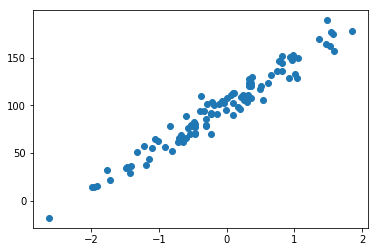

In [58]:
plt.scatter(X, y)

In [59]:
coef

array(41.74110031)

In [62]:
y_gen = X * coef + bias

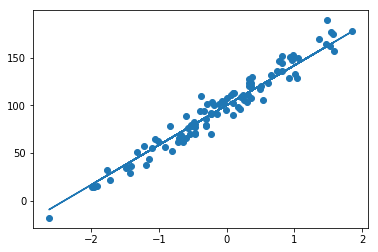

In [63]:
plt.scatter(X, y)
plt.plot(X, y_gen)

In [61]:
y[:10]

array([150.77992943,  89.93472984,  65.08160809, 110.52674299,
        82.26162276, 131.56459551,  69.93111725, 105.91200699,
       123.47337416, 132.34359474])

In [64]:
from sklearn.linear_model import LinearRegression

In [66]:
model = LinearRegression()

In [67]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
print(model.coef_, model.intercept_)

[44.43716999] 101.16511532052698


In [69]:
print(coef, bias)

41.7411003148779 100


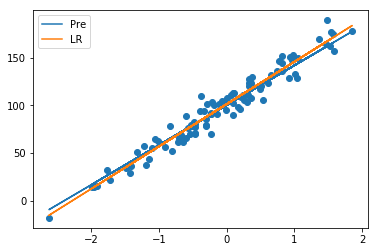

In [73]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="LR")
plt.legend()

In [78]:
class LinearRegCustom:
    
    def __init__(self, lr=.1):
        self.lr = lr
        
    def fit(self, X, y):
        
        self.__X = X
        self.__y = y.reshape(-1, 1)
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        for i in range(100):
            self.gradient_decend()
            
        
    def gradient_decend(self):
        
        d_coef, d_intercept = self.gradient()
        
        self.coef_ -= d_coef * self.lr
        self.intercept_ -= d_intercept * self.lr
        
    def gradient(self):
        
        yh = self.predict(self.__X)
        # from derivation
        d_coef = ((yh-self.__y) * self.__X).mean()
        d_intercept = (yh-self.__y).mean()
        
        return d_coef, d_intercept
    
    def predict(self, X):
        return X * self.coef_ + self.intercept_
    
    

In [79]:
model = LinearRegCustom()

In [80]:
model.fit(X, y)

In [81]:
print(model.coef_, model.intercept_)

44.41518280662787 101.15356642107149


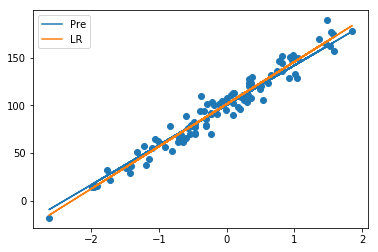

In [82]:
plt.scatter(X, y)
plt.plot(X, y_gen, label="Pre")
plt.plot(X, model.predict(X), label="LR")
plt.legend()